In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/prometeo23-pre-event-ml/sample_submission.csv
/kaggle/input/prometeo23-pre-event-ml/train.csv
/kaggle/input/prometeo23-pre-event-ml/test.csv


In [2]:
train_loc='/kaggle/input/prometeo23-pre-event-ml/train.csv'
train_data=pd.read_csv(train_loc)
train_data.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_759,f_760,f_761,f_762,f_763,f_764,f_765,f_766,f_767,label
0,55.391998,402.842010,1179.939941,137.306000,275.936005,-668.432983,738.448975,509.286987,413.082001,-1350.576050,...,-697.203979,-219.283005,225.966003,-43.695000,626.716980,-295.596985,-635.940979,31.915001,158.291000,4
1,498.306000,118.342003,1222.817993,646.617004,746.257019,-473.803986,-11.617000,-16.693001,269.397003,-613.716003,...,-288.542999,-441.739990,-406.356995,174.936996,532.174011,-443.278992,-68.603996,-493.657013,-368.730011,1
2,1465.275024,-2211.415039,2463.522949,945.344971,922.330994,338.187988,-1548.826050,-818.586975,-1007.841003,79.605003,...,-507.450012,1626.469971,-1210.922974,4531.459961,-2801.270020,2071.193115,-99.113998,-475.681000,2455.382080,3
3,-480.721008,-200.492996,994.544983,429.501007,603.341980,335.571991,-789.293030,315.600006,79.110001,-700.228027,...,190.117996,-141.376999,-158.606995,789.737000,-157.804993,-241.746994,-488.445007,209.561005,-415.536987,4
4,259.115997,-71.842003,489.447998,23.549999,543.088989,-119.539001,-93.567001,55.488998,-235.072998,-773.299011,...,225.546005,-258.687988,-591.017029,359.621002,316.252014,-309.529999,200.304993,-167.130005,44.182999,4


checking the shape/no of features of the training data

In [3]:
train_data.shape

(36455, 769)

In [4]:
train_data.columns

Index(['f_0', 'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9',
       ...
       'f_759', 'f_760', 'f_761', 'f_762', 'f_763', 'f_764', 'f_765', 'f_766',
       'f_767', 'label'],
      dtype='object', length=769)

checking for null values

In [5]:
train_data.isna().sum().sum()

0

splitting into input and target features

In [6]:
X=train_data.iloc[:,1:-1]
y=train_data.iloc[:,-1]

In [7]:
X.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_758,f_759,f_760,f_761,f_762,f_763,f_764,f_765,f_766,f_767
0,402.842010,1179.939941,137.306000,275.936005,-668.432983,738.448975,509.286987,413.082001,-1350.576050,-80.608002,...,225.628006,-697.203979,-219.283005,225.966003,-43.695000,626.716980,-295.596985,-635.940979,31.915001,158.291000
1,118.342003,1222.817993,646.617004,746.257019,-473.803986,-11.617000,-16.693001,269.397003,-613.716003,183.091995,...,668.473999,-288.542999,-441.739990,-406.356995,174.936996,532.174011,-443.278992,-68.603996,-493.657013,-368.730011
2,-2211.415039,2463.522949,945.344971,922.330994,338.187988,-1548.826050,-818.586975,-1007.841003,79.605003,73.060997,...,868.348022,-507.450012,1626.469971,-1210.922974,4531.459961,-2801.270020,2071.193115,-99.113998,-475.681000,2455.382080
3,-200.492996,994.544983,429.501007,603.341980,335.571991,-789.293030,315.600006,79.110001,-700.228027,203.610001,...,93.406998,190.117996,-141.376999,-158.606995,789.737000,-157.804993,-241.746994,-488.445007,209.561005,-415.536987
4,-71.842003,489.447998,23.549999,543.088989,-119.539001,-93.567001,55.488998,-235.072998,-773.299011,292.566010,...,-150.707001,225.546005,-258.687988,-591.017029,359.621002,316.252014,-309.529999,200.304993,-167.130005,44.182999


In [8]:
y.head()

0    4
1    1
2    3
3    4
4    4
Name: label, dtype: int64

scaling the data using MinMaxScaling

In [9]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)
print(X)

[[0.6267913  0.34201027 0.38761266 ... 0.44135792 0.3651723  0.43490345]
 [0.6160183  0.34315086 0.41334262 ... 0.45996804 0.35084152 0.41276741]
 [0.52779873 0.37615464 0.4284341  ... 0.45896723 0.35133167 0.53138631]
 ...
 [0.57496719 0.33319375 0.415642   ... 0.44225366 0.35429832 0.4917535 ]
 [0.60263183 0.34939503 0.37358759 ... 0.45034944 0.36486762 0.42921954]
 [0.58253366 0.37855084 0.38348626 ... 0.43893653 0.34968109 0.43360033]]


time to use PCA to analyse the variance. For this notebook we will use PCA without SMOTE

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X)

PCA()

We have successfully fitted the PCA on all independent variables. Let’s now extract explained_variance and explained_varience_ratio which are ordered lists starting from most significant features to least.

In [11]:
# features sorted based on eigenvalues
pca.explained_variance_  

array([1.61703587e-01, 3.92616305e-02, 3.36077622e-02, 2.69320544e-02,
       2.27427184e-02, 2.07580651e-02, 1.47589934e-02, 1.40325260e-02,
       1.22066808e-02, 1.08697184e-02, 9.54749050e-03, 9.10890377e-03,
       8.13782010e-03, 7.79911641e-03, 7.46538364e-03, 6.89364173e-03,
       6.59626839e-03, 6.39091317e-03, 6.06943560e-03, 5.73966107e-03,
       5.37133008e-03, 5.08234400e-03, 4.87168887e-03, 4.76996364e-03,
       4.57563335e-03, 4.47726918e-03, 4.37239173e-03, 4.13226037e-03,
       4.00560143e-03, 3.99959920e-03, 3.83211262e-03, 3.73184654e-03,
       3.62672564e-03, 3.40270996e-03, 3.27077563e-03, 3.12680866e-03,
       3.09989552e-03, 2.97069746e-03, 2.91604793e-03, 2.89077812e-03,
       2.74073186e-03, 2.62019073e-03, 2.58004172e-03, 2.53825730e-03,
       2.47396385e-03, 2.44967526e-03, 2.40351661e-03, 2.32283944e-03,
       2.27073197e-03, 2.25320877e-03, 2.17839553e-03, 2.10729629e-03,
       2.10202863e-03, 2.07472237e-03, 2.00028991e-03, 1.97000712e-03,
      

now lets find the percentage

In [12]:
# Percentage contribution of each feature
pca.explained_variance_ratio_

array([2.22476484e-01, 5.40172899e-02, 4.62385339e-02, 3.70539016e-02,
       3.12900916e-02, 2.85595480e-02, 2.03058511e-02, 1.93063562e-02,
       1.67943054e-02, 1.49548738e-02, 1.31357143e-02, 1.25322940e-02,
       1.11962489e-02, 1.07302505e-02, 1.02710913e-02, 9.48447222e-03,
       9.07533736e-03, 8.79280370e-03, 8.35050553e-03, 7.89679217e-03,
       7.39003170e-03, 6.99243628e-03, 6.70261083e-03, 6.56265431e-03,
       6.29528906e-03, 6.15995678e-03, 6.01566336e-03, 5.68528366e-03,
       5.51102263e-03, 5.50276458e-03, 5.27233168e-03, 5.13438270e-03,
       4.98975432e-03, 4.68154704e-03, 4.50002798e-03, 4.30195403e-03,
       4.26492617e-03, 4.08717172e-03, 4.01198332e-03, 3.97721638e-03,
       3.77077839e-03, 3.60493440e-03, 3.54969623e-03, 3.49220801e-03,
       3.40375121e-03, 3.37033427e-03, 3.30682786e-03, 3.19582988e-03,
       3.12413891e-03, 3.10002998e-03, 2.99709975e-03, 2.89927936e-03,
       2.89203195e-03, 2.85446321e-03, 2.75205687e-03, 2.71039293e-03,
      

finding the best cumulative sum of features to use

Text(0.5, 1.0, 'Scree plot')

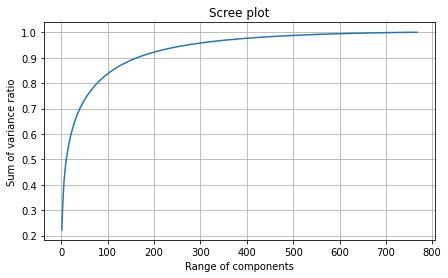

In [13]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(7,4))
plt.plot(range(1,768,1),np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Sum of variance ratio')
plt.xlabel('Range of components')
plt.grid()
plt.title('Scree plot')


trying to find Range of Comp. at 0.98 variance

In [14]:
x_value = np.interp(0.98,np.cumsum(pca.explained_variance_ratio_), np.arange(1,768,1))
print(x_value)

427.30224722710875


therefore 427 is the number of features/ or the optimal components with 98 percent variance

In [15]:
pca=PCA(n_components=427)
pca.fit(X)

PCA(n_components=427)

now let us see the cumulative ratio or percentage of these 427 features

In [16]:
pca.explained_variance_ratio_.cumsum()

array([0.22247648, 0.27649377, 0.32273231, 0.35978621, 0.3910763 ,
       0.41963585, 0.4399417 , 0.45924806, 0.47604236, 0.49099724,
       0.50413295, 0.51666524, 0.52786149, 0.53859174, 0.54886283,
       0.55834731, 0.56742264, 0.57621545, 0.58456595, 0.59246275,
       0.59985278, 0.60684521, 0.61354782, 0.62011048, 0.62640577,
       0.63256572, 0.63858139, 0.64426667, 0.64977769, 0.65528046,
       0.66055279, 0.66568717, 0.67067693, 0.67535847, 0.6798585 ,
       0.68416046, 0.68842538, 0.69251255, 0.69652454, 0.70050175,
       0.70427253, 0.70787747, 0.71142716, 0.71491937, 0.71832312,
       0.72169346, 0.72500028, 0.72819611, 0.73132025, 0.73442028,
       0.73741738, 0.74031666, 0.74320869, 0.74606316, 0.74881521,
       0.75152561, 0.75422772, 0.75683735, 0.75940557, 0.76195721,
       0.76447774, 0.76692997, 0.76931877, 0.77170251, 0.77403463,
       0.77629721, 0.77854517, 0.78077619, 0.78297753, 0.78515235,
       0.78726427, 0.7893395 , 0.79140442, 0.79344324, 0.79543

Splitting of the dataset into train and test

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(pca.transform(X),y,random_state=0, test_size = 0.2)
# Creating the training and test sets
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((29164, 427), (29164,), (7291, 427), (7291,))

In [18]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=250,max_depth=5,random_state=1)

fitting the model to the dataset

In [19]:
model.fit(x_train, y_train)
# Making predictions with the trained model
y_pred = model.predict(x_test)

test accuracy

In [20]:
# Test accuracy
model.score(x_test,y_test)

0.31600603483747086

using accuracy score lets test the predictions again

In [21]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test,y_pred)

print(accuracy)

0.31600603483747086


using Confusion matrix to understand the situation

In [22]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[   0,    0,  153,   37,  747],
       [   0,    0,   15,   24, 1156],
       [   0,    0,  198,  152, 1445],
       [   0,    0,   61,  364,  934],
       [   0,    0,   84,  179, 1742]])